# Les séries temporelles avec Python (1/4)

## Introduction à la manipulation de données temporelles avec Python

Pandas a été développé dans un contexte de données financière et vient de *Panel Datas* pour données de panel, c'est-à-dire des données pour lesquelles on a, pour un même individu, des observations au cours du temps. Pandas contient donc de nombreux outils pour travailler avec les dates, le temps et des données indéxées sen fonction du temps.

Les séries temporelles peuvent être vues comme un cas très particulier des données panel puisqu'il s'agit de l'évolution d'une seule observation au cours du temps.

Un peu de vocabulaire :
- **Timestamps** correspond à un moment précis (par exemple *03 juin 2020, 14:15:16*)
- **Time intervals** et **periods** correspond à une durée ayant une date de début et de fin précise (par exemple, l'année *2020*)
- **Time deltas** ou **durations** correspondent à une durée exacte (par exemple *123.45 secondes*)

On va pour commencer faire un point sur comment utiliser et manipuler ce type de données date/time avec Python d'une part, puis avec Pandas plus particulièrement.

**NB :** ce notebook est introductif donc ne pas hésiter à se référer à la section ["Time Series/Date functionnality"](http://pandas.pydata.org/pandas-docs/stable/timeseries.html) de la documentation Pandas qui elle est bien complète

## Les dates (et heures) avec Python

Python a de nombreuses représentations et formats possibles des dates, heures, durées...  
Même si on utilisera surtout les outils Pandas concernant les séries temporelles, c'est pas mal de commencer par voir comment ça fonctionne en général et les liens avec les autres packages Python.

### Les packages`datetime` and `dateutil`

Les objet natifs Python pour les dates/times sont dans le module built-in `datetime`. En utilisant également le package `dateutil`, on peut facilement et rapidement faire un paquet d'opérations sur les dates/times.

Par exemple, on peut construire une date manuellement.

In [1]:
from datetime import datetime
datetime(year=2020, month=6, day=3)

datetime.datetime(2020, 6, 3, 0, 0)

Ou avec le module `dateutil`, on peut lire différents format de dates à partir de chaînes de caractères.

In [2]:
from dateutil import parser
d1 = parser.parse("3rd of June, 2020, 14:00")
d2 = parser.parse("03/06/2020 14:15:16", dayfirst=True)
d1, d2

(datetime.datetime(2020, 6, 3, 14, 0),
 datetime.datetime(2020, 6, 3, 14, 15, 16))

Une fois qu'on manipule un objet `datetime`, on peut facilement effectuer des opérations sur cet objet. Par exemple, récupérer le jour de la semaine correspondant.

In [3]:
d1.strftime("%A")

'Wednesday'

Pour en savoir plus sur `strftime` et les codes standards de format de string pour afficher les dates (ici `"%A"`) ce sera dans la [section strftime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) de la doc Python [datetime](https://docs.python.org/3/library/datetime.html).
Une autre aide utile sur les manipulation de dates est la [documentation en ligne de dateutil](http://labix.org/python-dateutil).

Un package utile [``pytz``](http://pytz.sourceforge.net/) contenant des outils pour pouvoir bosser avec les *timezones*

L'intérêt de `datetime` et `dateutil` est leur flexibilité et leur facilité d'utilisation/syntaxe : on peut faire plus ou moins tout ce qu'on veut en utilisant les objets `datetime` et leurs méthodes built-in.

Un bémol c'est la gestion des grandes quantités de dates/times : de la même manière que les listes numériques ne sont pas optimales comparées à des arrays numpy de type numérique, les listes d'objets `datetime` ne sont pas optimales comparées à des tableaux ayant un type date/time.

### Le type de données date des tableaux numpy : `datetime64`

Pour pallier cet écueil, un type de données time natif a été ajouté à `numpy`. Le dtype `datetime64` encode les dates sous forme d'entiers 64-bit et par conséquent les array ayant ce dtype sont très compacts.

Le dtype `datetime64` nécessite toutefois un format particulier :

In [4]:
import numpy as np
date = np.array('2020-06-03', dtype=np.datetime64)
date

array('2020-06-03', dtype='datetime64[D]')

Par contre, une fois qu'on a une date dans le bon format, on peut facilement effectuer des opérations vectorielles dessus :

In [5]:
date + np.arange(31)

array(['2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
       '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10',
       '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
       '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
       '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22',
       '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
       '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30',
       '2020-07-01', '2020-07-02', '2020-07-03'], dtype='datetime64[D]')

Grâce au type de données uniforme dans les tableaux `datetime64`, ce type d'opérations vectorielles peut être effectué bien plus rapidement qu'en travaillant directement avec les objets `datetime` de Python, particulièrement pour de grands tableaux.

Un détail des objets `datetime64` et `timedelta64` est qu'ils sont construits sur une *unité fondamentale de temps (UFT)*. Comme le `datetime64` est limité à une précision de 64-bit, le nombre de datetime qu'on peut encoder est $2^{64}$ fois l'UFT. En d'autres termes, `datetime64` nécessite un arbitrage entre la *résolution temporelle* et *intervalle maximal de temps* .  
Par exemple, si on veut une précision de 1 nanoseconde, alors on pourra avoir la place pour encoder $2^{64}$ nanosecondes, soit un peu moins de 600 ans.

`numpy` déduit l'UFT désirée à partir de l'input mais on peut bien sûr aussi le spécifier.

In [6]:
# un datetime basé sur le jour
np.datetime64('2020-06-03')

numpy.datetime64('2020-06-03')

In [7]:
# un datetime basé sur la minute
np.datetime64('2020-06-03 14:30')

numpy.datetime64('2020-06-03T14:30')

In [8]:
# un datetime basé sur la nanoseconde en fixant l'unité fondamentale de temps
np.datetime64('2020-06-03 14:30:45', 'ns')

numpy.datetime64('2020-06-03T14:30:45.000000000')

Notez que la timezone est par défaut celle de l'ordinateur qui exécute le code.  

Le tableau suivant récupéré de [la documentation numpy de datetime64](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html) liste les codes disponibles ainsiq que les échelles relatives et absolues qu'ils permettent d'encoder.

|Code  | Signification | Durée relative | Durée absolue           |
|------|---------------|----------------|-------------------------|
| `Y`  | Year          | ± 9.2e18 ans   | [9.2e18 av.J-C, 9.2e18] |
| `M`  | Month         | ± 7.6e17 ans   | [7.6e17 av.J-C, 7.6e17] |
| `W`  | Week          | ± 1.7e17 ans   | [1.7e17 av.J-C, 1.7e17] |
| `D`  | Day           | ± 2.5e16 ans   | [2.5e16 av.J-C, 2.5e16] |
| `h`  | Hour          | ± 1.0e15 ans   | [1.0e15 av.J-C, 1.0e15] |
| `m`  | Minute        | ± 1.7e13 ans   | [1.7e13 av.J-C, 1.7e13] |
| `s`  | Second        | ± 2.9e12 ans   | [ 2.9e9 av.J-C, 2.9e9]  |
| `ms` | Millisecond   | ± 2.9e9 ans    | [ 2.9e6 av.J-C, 2.9e6]  |
| `us` | Microsecond   | ± 2.9e6 ans    | [290301 av.J-C, 294241] |
| `ns` | Nanosecond    | ± 292 ans      | [ 1678, 2262]           |
| `ps` | Picosecond    | ± 106 jours    | [ 1969, 1970]           |
| `fs` | Femtosecond   | ± 2.6 heures   | [ 1969, 1970]           |
| `as` | Attosecond    | ± 9.2 secondes | [ 1969, 1970]           |

Dans la "vraie vie", on utilise généralement `datetime64[ns]` car cela permet d'encoder une échelle de temps avec des dates actuelles et une précision suffisament fine.

Finalement, on peut noter que si le type `datetime64` règle certains défauts du type built-in de Python `datetime`, il manque plusieurs des méthodes et fonctions bien utiles fournies par `datetime` et surtout par `dateutil`.

Plus d'infos sur [la doc datetime64 de numpy](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html).

### Dates et times avec pandas: le meilleur des 2 mondes


Pandas se base sur les outils vus à l'instant pour fournir un objet `Timestamp` qui combine la facilité d'utilisation de `datetime`/`dateutil` avec l'efficacité de stockage et de calcul vectoriel de``numpy.datetime64``.

À partir de ces objets `Timestamp`, Pandas peut construire une index `DatetimeIndex` qu'on peut utiliser pour indexer les données d'une `Series` ou d'un `DataFrame`.

Par exemple, on peut utiliser les outils de Pandas pour refaire les opérations qu'on a fait juste avant, à savoir: parser une chaîne de caractères contenant un format de date flexible, utiliser les codes de format pour récupérer le jour de la semaine et effectuer des opérations vectorielles comme avec `numpy`.

In [9]:
import pandas as pd
date = pd.to_datetime("3rd of June, 2020")
date

Timestamp('2020-06-03 00:00:00')

In [10]:
date.strftime('%A')

'Wednesday'

In [11]:
print(date.day, date.day_name())
print(date.year)
print(date.month, date.month_name())

3 Wednesday
2020
6 June


In [12]:
date + pd.to_timedelta(np.arange(31), 'D')

DatetimeIndex(['2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
               '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
               '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22',
               '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
               '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30',
               '2020-07-01', '2020-07-02', '2020-07-03'],
              dtype='datetime64[ns]', freq=None)

In [13]:
# autre exemple
d = pd.to_datetime("3rd of June, 2020, 14:00")
d + pd.to_timedelta(np.arange(0,73,6), 'h')

DatetimeIndex(['2020-06-03 14:00:00', '2020-06-03 20:00:00',
               '2020-06-04 02:00:00', '2020-06-04 08:00:00',
               '2020-06-04 14:00:00', '2020-06-04 20:00:00',
               '2020-06-05 02:00:00', '2020-06-05 08:00:00',
               '2020-06-05 14:00:00', '2020-06-05 20:00:00',
               '2020-06-06 02:00:00', '2020-06-06 08:00:00',
               '2020-06-06 14:00:00'],
              dtype='datetime64[ns]', freq=None)

In [14]:
# allez un dernier avant le suivant
d = pd.to_datetime("3rd of June, 2020, 14:00")
d + pd.to_timedelta(np.arange(0, 101, 10), 'm')

DatetimeIndex(['2020-06-03 14:00:00', '2020-06-03 14:10:00',
               '2020-06-03 14:20:00', '2020-06-03 14:30:00',
               '2020-06-03 14:40:00', '2020-06-03 14:50:00',
               '2020-06-03 15:00:00', '2020-06-03 15:10:00',
               '2020-06-03 15:20:00', '2020-06-03 15:30:00',
               '2020-06-03 15:40:00'],
              dtype='datetime64[ns]', freq=None)

On va regarder un peu plus en détails comment ça marche.

## Séries temporelles avec Pandas : indexation par le temps

L'intérêt des time series de Pandas réside dans l'utilisation d'une indexation des données par des *timestamps*. 

In [15]:
index = pd.DatetimeIndex(['2019-06-03', '2019-07-03', '2020-06-03', '2020-07-03'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2019-06-03    0
2019-07-03    1
2020-06-03    2
2020-07-03    3
dtype: int64

In [16]:
# Le DatetimeIndex de Pandas
data.index

DatetimeIndex(['2019-06-03', '2019-07-03', '2020-06-03', '2020-07-03'], dtype='datetime64[ns]', freq=None)

Une fois qu'on a une `Series`, on peut utiliser les index datetime comme pour n'importe quelle `Series` et notamment avoir recours au slicing.

In [17]:
data['2019-06-03':'2020-06-03']

2019-06-03    0
2019-07-03    1
2020-06-03    2
dtype: int64

Par ailleurs certaines opérations spécifiques aux DatetimeIndex permettent d'obtenir des slicing différents comme par exemple utiliser une année pour récupérer toutes les observations de cette année.

In [18]:
data['2020'], data['2020-06']

(2020-06-03    2
 2020-07-03    3
 dtype: int64,
 2020-06-03    2
 dtype: int64)

## Les structures Pandas pour les séries temporelles

On va introduire les structures de données fondamentales de Pandas pour travailler avec les séries temporelles :
- pour les *timestamps*, il y a le type `Timestamp` : en gros, ça remplace le type natif de Python `datetime` tout en étant construit sur le type `numpy.datetime64` qui est plus efficace. La structure d'index associée est le `DatetimeIndex`
- pour les *time Periods*, il y a le type `Period` : permet d'encoder des durées de fréquences fixes basées sur `numpy.datetime64`. La structure d'index associée est le `PeriodIndex`
- pour les *time deltas* ou *durations*, il y a le type`Timedelta` : `Timedelta` est un remplaçant plus efficace du type natif de Python `datetime.timedelta` et basé sur `numpy.timedelta64`. La structure d'index associée est le `TimedeltaIndex`

Les plus importantes de ces structures date/time sont les objets `Timestamp` and `DatetimeIndex`.

Même si on peut très bien appeler ces classes d'objets directement, généralement on passe par la fonction `pd.to_datetime()` qui permet de lire une grande variété de format. Si on passe une seule date à `pd.to_datetime()`, on obtient un `Timestamp`. Si on lui passe une série de dates, on obtient un `DatetimeIndex`

In [19]:
dates = pd.to_datetime([datetime(2020, 6, 3), '5th of June, 2020', '2020-Jun-7', '06-10-2020', '20200615'])
dates

DatetimeIndex(['2020-06-03', '2020-06-05', '2020-06-07', '2020-06-10',
               '2020-06-15'],
              dtype='datetime64[ns]', freq=None)

Tout objet `DatetimeIndex` peut être converti en `PeriodIndex` avec la fonction `to_period()` en ajoutant un code de fréquence (par exemple `'D'` pour une fréquence quotidienne ou `'M'` pour une fréquence mensuelle) :

In [20]:
dates.to_period('M')

PeriodIndex(['2020-06', '2020-06', '2020-06', '2020-06', '2020-06'], dtype='period[M]', freq='M')

In [21]:
dates.to_period('D')

PeriodIndex(['2020-06-03', '2020-06-05', '2020-06-07', '2020-06-10',
             '2020-06-15'],
            dtype='period[D]', freq='D')

Enfin, un objet `TimedeltaIndex` peut être par exemple créé lorsqu'on soustrait 2 dates :

In [22]:
dates - dates[0]

TimedeltaIndex(['0 days', '2 days', '4 days', '7 days', '12 days'], dtype='timedelta64[ns]', freq=None)

### Les séquences avec `pd.date_range()`

Pour pouvoir créer des séquences régulières de dates,  Pandas contient un certain nombre de fonctions : `pd.date_range()`, `pd.period_range()` et `pd.timedelta_range()`.
Comme pour le `range()` de Python et `arange()` de numpy, on a un point de départ, d'arrivée et éventuellement un pas : `pd.date_range()` prend des dates de départ et de fin, et éventuellement une fréquence (qui vaut 1 jour par défaut) :

In [23]:
pd.date_range('2020-06-03', '2020-06-12')

DatetimeIndex(['2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
               '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12'],
              dtype='datetime64[ns]', freq='D')

On peut aussi spécifier simplement un point de départ et un nombre de Periods et on peut utiliser `freq` pour modifier la fréquence.

In [24]:
pd.date_range('2020-06-03', periods=8)

DatetimeIndex(['2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
               '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10'],
              dtype='datetime64[ns]', freq='D')

In [25]:
pd.date_range('2020-06-03', periods=8, freq='H')

DatetimeIndex(['2020-06-03 00:00:00', '2020-06-03 01:00:00',
               '2020-06-03 02:00:00', '2020-06-03 03:00:00',
               '2020-06-03 04:00:00', '2020-06-03 05:00:00',
               '2020-06-03 06:00:00', '2020-06-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

Vous pouvez jeter un oeil à `pd.period_range()` et `pd.timedelta_range()` qui fonctionnent pareil.

In [26]:
pd.period_range('2020-06', periods=8, freq='M')

PeriodIndex(['2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11',
             '2020-12', '2021-01'],
            dtype='period[M]', freq='M')

In [27]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

Vous l'aurez compris, pour bien apter ce qu'il se passe il faut avoir une idée des codes de fréquences...

## Fréquences et décalages (offset)

Le concept de fréquence ou de décalage (on parlera généralement d'offset)  est fondamental pour les outils Pandas de séries temporelles.
On a déjà croisé les codes `M` (month), `D` (day) et `H` (hour) pour définir des fréquences, on va résumé les codes Pandas dans le tableau suivant.

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

Les fréquences mensuelles, trimestrielles et annuelles pointent à la fin de la période par défaut. En ajoutant un suffixe `S` à la fin du nom, elles pointeront à la place au début de la période.

| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | Month start            ||``BMS``  | Business month start   |
| ``QS``  | Quarter start          ||``BQS``  | Business quarter start |
| ``AS``  | Year start             ||``BAS``  | Business year start    |

On peut aussi modifier le mois utilisé pour marquer un code trimestriel ou annuel en ajoutant les 3 lettres du mois en suffixes:
- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

De la même manière, le "jour seuil" d'une fréquence hebdomadaire peut être modifié en ajoutant en suffixes les 3 lettres du jour:
- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

Enfin, les codes peuvent être combinés avec des valeurs numériques pour spécifier d'autres fréquences. Par exemple, pour une fréquence de 2h30min, on peut faire:

In [28]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

Tout ça vient en fait du module ``pd.tseries.offsets`` module.

In [29]:
# Par exemple, pour créer un décalage de jour ouvrable, on peut faire :
from pandas.tseries.offsets import BDay
pd.date_range('2020-06-03', periods=5, freq=BDay())

DatetimeIndex(['2020-06-03', '2020-06-04', '2020-06-05', '2020-06-08',
               '2020-06-09'],
              dtype='datetime64[ns]', freq='B')

In [30]:
# Par exemple, pour récupérer le dernier jour ouvrable du mois, on peut faire :
from pandas.tseries.offsets import BMonthEnd
pd.date_range('2020-06-03', periods=8, freq=BMonthEnd())

DatetimeIndex(['2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-30', '2020-11-30', '2020-12-31', '2021-01-29'],
              dtype='datetime64[ns]', freq='BM')

Pour en savoir plus, il y a la [section "DateOffset"](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) de la doc Pandas.

## Un peu d'anglicisme : Resampling, Shifting, and Windowing

- *Resampling* = rééchantillonnage
- *Shifting* = déplacement
- *Windowing* = fenêtrage

La capacité à utiliser les dates/times comme indices pour organiser et accéder aux données est une point important des outils de séries temp sur Pandas. Les avantages de l'indexation (alignement, slicing, etc...) sont conservés et Pandas fournit par ailleurs plusieurs opérations spécifiques séries temp (séries temp désignent ici une `Series` indexées par un `DatetimeIndex`, en général).

On va en voir quelques unes en utilisant en exemple le cours de l'action Google en bourse (données récupérées sur Yahoo finance).

> **Petit exo :**
>- importer les données `GOOG.csv` en utilisant les bons paramètres pour avoir un DatetimeIndex à partir de la colonne indiquant les dates
>- ne conserver que la série 'Close' qui correspond au prix de l'action à la fermeture
>- afficher la série

In [31]:
goog = pd.read_csv('data/GOOG.csv', index_col='Date', parse_dates=True)
goog.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128600
2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241200
2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221400
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941200


In [32]:
goog.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2020-05-15', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-26', '2020-05-27',
               '2020-05-28', '2020-05-29'],
              dtype='datetime64[ns]', name='Date', length=3972, freq=None)

In [33]:
goog = goog['Close']
goog

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239193
2004-08-25      52.802086
                 ...     
2020-05-22    1410.420044
2020-05-26    1417.020020
2020-05-27    1417.839966
2020-05-28    1416.729980
2020-05-29    1428.920044
Name: Close, Length: 3972, dtype: float64

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set() #pour définir les paramètres d'affichage de seaborn par défaut
plt.rcParams["figure.figsize"] = (12,8)

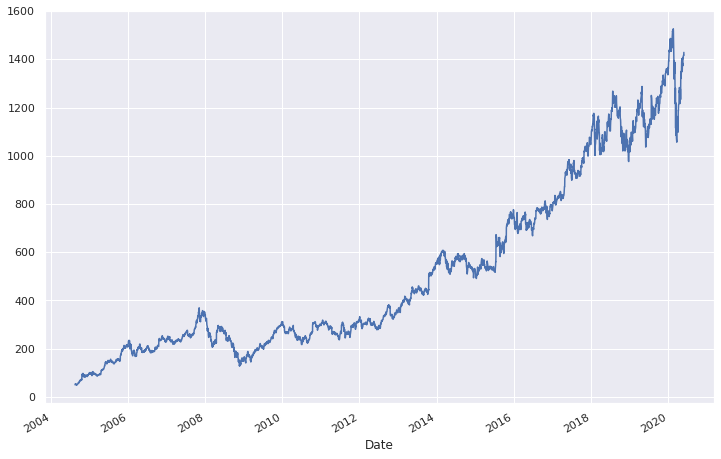

In [35]:
goog.plot();

### Rééchantillonage et conversion de fréquences

Une manipulation classique des séries temporelles est le rééchantionnage (resampling) à une fréquence plus ou moins haute. Il y a pour ce faire les méthodes `resample()` ou `asfreq()`. La différence entre les deux est que `resample` consiste à agréger toutes les données comprises entre 2 multiples de la fréquence alors que `asfreq` sélectionne la valeur correspondant à la fréquence.

> **Petit exo :**
>- Regarder la différence entre les 2 affichant sur un même grapique les 3 séries 'close', 'resample' et 'asfreq' en choisissant la fréquence que vous voulez

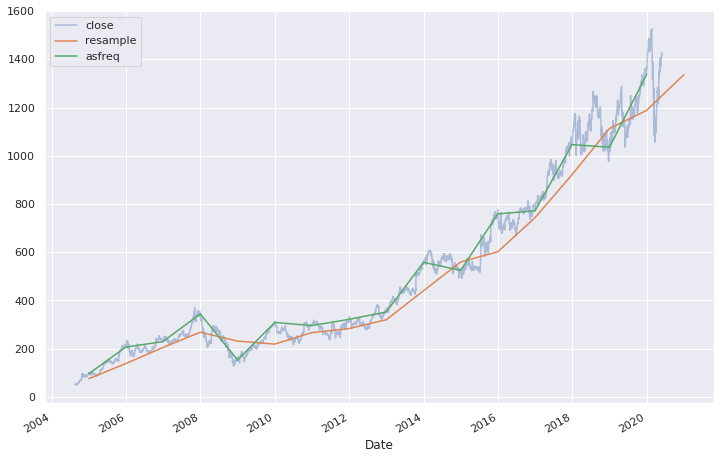

In [36]:
goog.plot(alpha=0.4)
goog.resample('BA').mean().plot()
goog.asfreq('BA').plot();
plt.legend(['close', 'resample', 'asfreq'], loc='upper left');

Pour un resampling avec une fréquence plus importante, `resample()` et `asfreq()` sont équivalentes. Par défaut, les 2 méthodes laissent les valeurs non existantes vides. Toutefois, `asfreq()` accepte un paramètre `method` dans lequel on peut spécifier comment imputer les valeurs manquantes générées par l'augmentation de la fréquence.

> **Petit exo :**
>- Selectionner uniquement les 14 derniers jours
>- Faire un resampling de la série GOOG.csv avec une fréquence quotidienne, ça incluera donc les weekends)
>- Afficher pour chaque méthode (`resample()` et `asfreq()`) les courbes rééchatillonnées sans imputer les valeurs manquantes, avec une imputation de type "bfill" et une imputation de type "ffill" (donc 2x3 courbes)

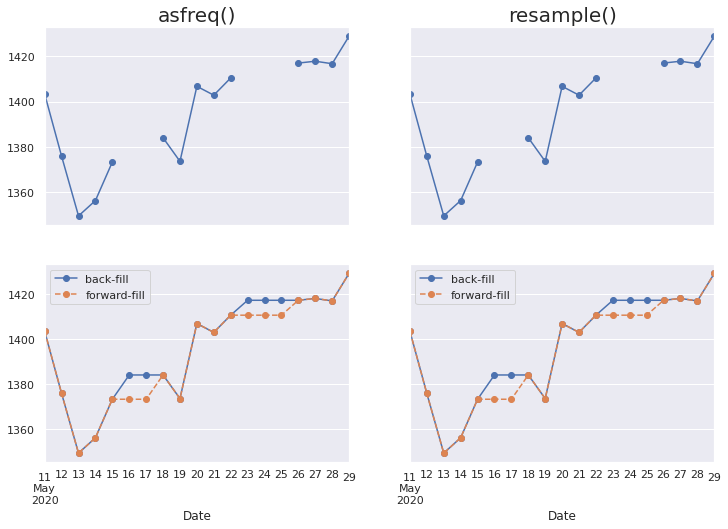

In [37]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True)
data = goog.iloc[-14:]

#avec asfreq
data.asfreq('D').plot(ax=ax[0,0], marker='o')
ax[0,0].set_title("asfreq()", fontsize=20);

data.asfreq('D', method='bfill').plot(ax=ax[1,0], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1,0], style='--o')
ax[1,0].legend(["back-fill", "forward-fill"]);

#avec resample
data.resample('D').mean().plot(ax=ax[0,1], marker='o')
ax[0,1].set_title("resample()", fontsize=20);

data.resample('D').bfill().plot(ax=ax[1,1], style='-o')
data.resample('D').ffill().plot(ax=ax[1,1], style='--o')
ax[1,1].legend(["back-fill", "forward-fill"]);

### Déplacements

Une opération classique sur les séries temporelles est le déplacement ou décalage (on parle plus souvent de *time-shifts* ou *shifting*)

Deux méthodes sont prévues pour ça : `shift()` et `tshift()`. Pour faire court, la différence entre les deux est que `shift()` déplace les données alors que`tshift()` déplace les index. Dans les 2 cas, le décalage doit être un multiple de la fréquence.

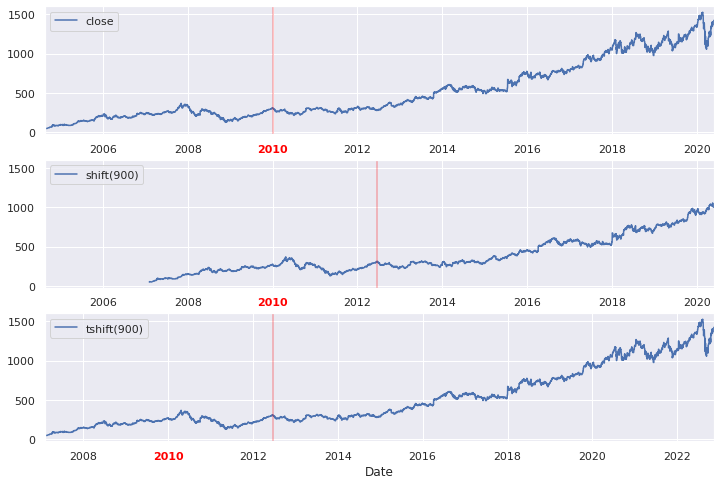

In [38]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='ffill')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2010-01-01')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['close'], loc=2)
ax[0].get_xticklabels()[3].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[3].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[2].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

>**Petit exo :**
>- Utiliser le *shifting* pour calculer le retour sur investissement à 1 an de l'action de Google (ROI - *return on investment*)
>- Tracer la série temporelle ROI ainsi créée
>- Analyser (rapidement) la courbe obtenue

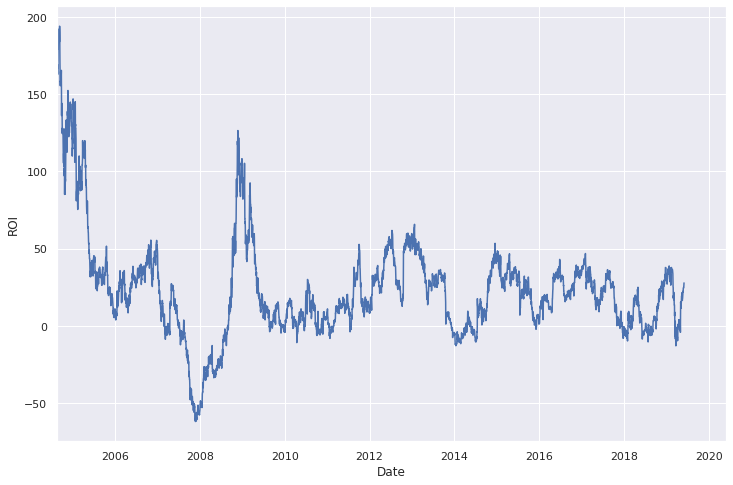

In [39]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.iloc[365:].plot()
plt.ylabel('ROI');

### Attention, fenêtres glissantes

Enfin, la 3ème opération classique des séries temporelles consiste à calculer différentes statistiques sur une fenêtre d'une longueur donnée et qui se déplace. On parle de *rolling window* et pas vraiment de fenêtre glissante...et pour faire ça, Pandas fournit la méthode `rolling()` pour les objets `Series` et `DataFrame`. 

> **Petit exo :**
>- Utiliser la méthode rolling pour calculer la moyenne annuelle centrée et l'écart-type annuel centré
>- Afficher sur un même graphique les 3 courbes : 'close', 'moyenne' et 'std'

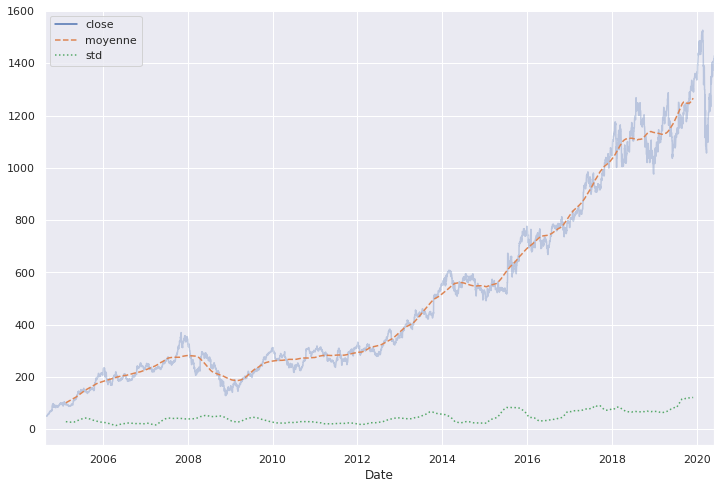

In [40]:
rol = goog.rolling(365, center=True)

data = pd.DataFrame({'close': goog,
                     'moyenne': rol.mean(),
                     'std': rol.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)